In [1]:
#!pip install tsfel
from tsfel.feature_extraction import features as tsfelf
import numpy as np
from scipy import signal
import pandas as pd
import glob
import sklearn
from scipy.io import wavfile
from scipy.signal import decimate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
source_samp_rate=44100
decimation_factor = 4
#actual samples per second. When we record 1 second of audio we get only something like 0.9 seconds because of the chunk size
chunk=4096
single_audio_frame_size=10*chunk

#Preprocessing.
Filtration and feature extraction

In [3]:
def hpf(arr,fs,lf,order):
    wbut = lf
    bbut, abut = signal.butter(order,wbut, btype='highpass', fs=fs)
    return signal.filtfilt(bbut, abut, arr)

def get_features(sig,label,fs = 44100):
    
    features = ["RMS", "RMS_filt","Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", \
                "Spectral_centroid_filt","Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]

        
    s_f = hpf(sig, fs, 65, 2)
    RMS = tsfelf.rms(sig)
    RMS_filt= tsfelf.rms(s_f)
    
    Zero_Cross = tsfelf.zero_cross(sig)
    Zero_Cross_filt = tsfelf.zero_cross(s_f)
            
    Spectral_centroid = tsfelf.spectral_centroid(sig, fs)
    Spectral_centroid_filt = tsfelf.spectral_centroid(s_f, fs)
            
    Spectral_slope = tsfelf.spectral_slope(sig, fs)
    Spectral_slope_filt = tsfelf.spectral_slope(s_f, fs) 
            
    Spectral_spread = tsfelf.spectral_spread(sig, fs)
    Spectral_spread_filt = tsfelf.spectral_spread(s_f, fs) 
            
    STD = np.std(sig)
            
    STD_filt = np.std(s_f)

    return [label, RMS, RMS_filt, Zero_Cross, Zero_Cross_filt, Spectral_centroid, 
     Spectral_centroid_filt,Spectral_slope, Spectral_slope_filt, Spectral_spread, Spectral_spread_filt,  
      STD, STD_filt]

In [4]:
def get_features_from_folder(folder_path,label,decimation_factor):
    files=glob.glob(folder_path+"/*.wav")
    #print(files)
    features_array = []
    for file_path in files:
        samplerate, sdata=wavfile.read(file_path)
        decimated_data=decimate(sdata,decimation_factor)
        sample1=decimated_data[0:int(single_audio_frame_size/decimation_factor*3)]
        sample2=decimated_data[int(single_audio_frame_size/decimation_factor*3+1):int(single_audio_frame_size/decimation_factor*6+1)]
        sample3=decimated_data[int(single_audio_frame_size/decimation_factor*6+2):int(single_audio_frame_size/decimation_factor*9+2)]
        print(len(sample1),len(sample2),len(sample3))
        features1=get_features(sample1,label,samplerate/decimation_factor)
        features2=get_features(sample2,label,samplerate/decimation_factor)
        features3=get_features(sample3,label,samplerate/decimation_factor)
        features_array.append(features1)
        features_array.append(features2)
        features_array.append(features3)
    return features_array


In [5]:
wg_path = "C:\\Users\\AtteR\\Desktop\\Wet gravel"
dg_path = "C:\\Users\\AtteR\\Desktop\\Dry gravel"
da_path = "C:\\Users\\AtteR\\Desktop\\Dry asphalt"
wa_path = "C:\\Users\\AtteR\\Desktop\\Wet asphalt"
ice_path="C:\\Users\\AtteR\\Desktop\\Ice"
wg_features=np.asarray(get_features_from_folder(wg_path,"Wet gravel",decimation_factor))
dg_features=np.asarray(get_features_from_folder(dg_path,"Dry gravel",decimation_factor))
da_features=np.asarray(get_features_from_folder(da_path,"Dry asphalt",decimation_factor))
wa_features=np.asarray(get_features_from_folder(wa_path,"Wet asphalt",decimation_factor))
ice_features=np.asarray(get_features_from_folder(ice_path,"Ice",decimation_factor))

30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 3072

30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 3072

In [6]:
print(len(wg_features),len(dg_features),len(da_features),len(wa_features),len(ice_features))

93 246 1176 483 42


In [7]:
all_features=np.concatenate((wg_features,dg_features,da_features,wa_features,ice_features))

In [8]:
columnlist=["Label","RMS", "RMS_filt","Zero-Cross", "Zero-Cross_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                 "Spectral_slope","Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]
roadtype_features_df=pd.DataFrame(all_features,columns=columnlist)
roadtype_features_df.head()

,Label,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet gravel,121.92391460938157,85.87118160323365,1120,1674,712.5904996804134,812.0604470474331,-5.2537629315864086e-08,-4.998018049220947e-08,900.8488695364975,920.8849937458162,121.9228455729547,85.87117244812917
1,Wet gravel,118.56077762961884,82.95456664125628,1603,2353,836.8418452474308,959.8708169615314,-4.934303169146411e-08,-4.6179862238637136e-08,1023.9019867603666,1052.3629476588944,118.559702728708,82.9545505401432
2,Wet gravel,143.70605958899822,105.42273134760192,3033,4376,1273.9581217320213,1420.2785316388545,-3.8104436148922846e-08,-3.4342425912683755e-08,1242.6124586103535,1233.8428115719178,143.70459814525356,105.42272665761529
3,Wet gravel,180.74153438103997,133.4367621474807,3092,4087,1165.099723623979,1327.8755292836472,-4.0903269259380946e-08,-3.67181781467081e-08,1232.0124702292565,1235.4716661058228,180.74103423541527,133.43675499074976
4,Wet gravel,297.3831429564873,233.13526339141885,4443,5729,1466.8412660916308,1608.260925200573,-3.314526221043495e-08,-2.9509254045121327e-08,1333.457679749013,1316.2499090312697,297.38242959361764,233.1352449317062


In [9]:
print(len(roadtype_features_df))
roadtype_features_df = roadtype_features_df.dropna()
print(len(roadtype_features_df))

2040
2040


In [10]:
y=roadtype_features_df["Label"]
print(len(y))
features=["RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]
X=roadtype_features_df[features]
X.head()

2040


,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,121.92391460938157,85.87118160323365,712.5904996804134,812.0604470474331,1120,1674,-5.2537629315864086e-08,-4.998018049220947e-08,900.8488695364975,920.8849937458162,121.9228455729547,85.87117244812917
1,118.56077762961884,82.95456664125628,836.8418452474308,959.8708169615314,1603,2353,-4.934303169146411e-08,-4.6179862238637136e-08,1023.9019867603666,1052.3629476588944,118.559702728708,82.9545505401432
2,143.70605958899822,105.42273134760192,1273.9581217320213,1420.2785316388545,3033,4376,-3.8104436148922846e-08,-3.4342425912683755e-08,1242.6124586103535,1233.8428115719178,143.70459814525356,105.42272665761529
3,180.74153438103997,133.4367621474807,1165.099723623979,1327.8755292836472,3092,4087,-4.0903269259380946e-08,-3.67181781467081e-08,1232.0124702292565,1235.4716661058228,180.74103423541527,133.43675499074976
4,297.3831429564873,233.13526339141885,1466.8412660916308,1608.260925200573,4443,5729,-3.314526221043495e-08,-2.9509254045121327e-08,1333.457679749013,1316.2499090312697,297.38242959361764,233.1352449317062


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)

KNN confusion matrix


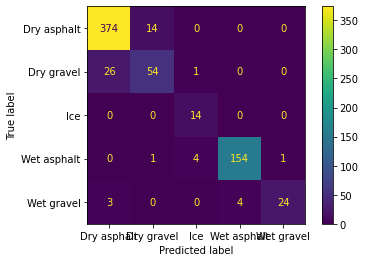

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)


In [13]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.9198813056379822


Let's do some scaling

In [14]:
scaled_df=roadtype_features_df.copy()
scaler = preprocessing.StandardScaler()
scaled_df[features]=scaler.fit_transform(scaled_df[features])
scaled_df.head()

,Label,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet gravel,-1.049098,-1.035016,-2.070534,-2.059478,-1.477718,-1.438478,-1.477718,-1.438478,-0.133124,0.114535,-1.049098,-1.035016
1,Wet gravel,-1.049663,-1.035534,-1.788146,-1.643219,-0.986065,-0.820589,-0.986065,-0.820589,0.947796,1.235137,-1.049663,-1.035534
2,Wet gravel,-1.045435,-1.031544,-0.952091,-0.403023,0.743569,1.104043,0.743569,1.104043,2.868986,2.781911,-1.045435,-1.031544
3,Wet gravel,-1.039207,-1.026569,-0.917596,-0.580194,0.312825,0.717773,0.312825,0.717773,2.775873,2.795794,-1.039207,-1.026569
4,Wet gravel,-1.019591,-1.008864,-0.127728,0.426431,1.506793,1.889862,1.506793,1.889862,3.666986,3.484276,-1.019591,-1.008864


KNN_with_scaling confusion matrix


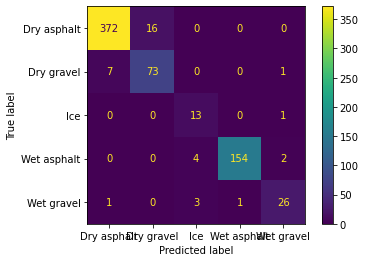

In [15]:
y=scaled_df["Label"]
X=scaled_df[features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(x_train, y_train)
y_pred_knn = knn_with_scaling.predict(x_test)
print("KNN_with_scaling confusion matrix")
plot_confusion_matrix(knn_with_scaling, x_test, y_test)

In [16]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.9465875370919882


In [17]:
filename="df-"+str(decimation_factor)+"_wl-3s_"+"19.1.2022.csv"
roadtype_features_df.to_csv(filename,index=False)